# SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

Get the previously encoded and formatted data

In [2]:
df = pd.read_csv('encoded_df.csv')

To use a scaler we need to convert all features to numerical data - this includes the date strings.

In [3]:
# convert date column to datetime
df['relDate'] = pd.to_datetime(df['relDate'])

df['relYear'] = df['relDate'].dt.year
df['month'] = df['relDate'].dt.month
df['day'] = df['relDate'].dt.day

df = df.drop(columns='relDate')

Drop the id column as it is just used for refrence and should have no impact on the models.

In [4]:
df = df.drop(columns='id')

## SVM: Using All Features to Predict Runtime

Split the data into training and test data with the target being the minute (runtime).

In [5]:
y = df['minute']
X = df.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Standardize the features as SVMs work better with scaled data.

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the SVM Model

In [7]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred = svm.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.17      0.12      0.14         8
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         8
         6.0       0.14      0.08      0.10        38
         7.0       0.56      0.88      0.68       179
         8.0       0.23      0.05      0.08        64
         9.0       0.00      0.00      0.00        27
        10.0       0.14      0.10      0.12        20
        11.0       0.00      0.00      0.00         8
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         7
        16.0       0.05      0.25      0.08         4
        17.0       0.07      0.07      0.07        15
        18.0       0.00    

We can see from the output that when all the fields are present the percentage of correct predictions is very poor at ~6%.

The macro averages are also quite low indicating poor performance. The weighted average is also low but slightly better than the macro averages which indicates some influence from class distribution.

### Hyperparameter tuning

We will use GridSearchCV to help find the best parameters to use in the model.

*Note*: We have commented out the code after it successfully ran as it ran for over an hour. 

In [10]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'poly', 'sigmoid']
# }

# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
# grid.fit(X_train, y_train)

In [11]:
# print("Best Parameters: ", grid.best_params_)

We can see that the best parameters are {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [12]:
# grid_predictions = grid.predict(X_test)

In [13]:
# print(classification_report(y_test, grid_predictions))

Now lets attempt to build and fit the model again with these specific parameters in mind.

In [14]:
svm = SVC(kernel='rbf', C=1, gamma=0.01)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [15]:
y_pred_2 = svm.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred_2, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00        38
         7.0       0.52      0.93      0.67       179
         8.0       0.00      0.00      0.00        64
         9.0       0.00      0.00      0.00        27
        10.0       0.07      0.15      0.09        20
        11.0       0.00      0.00      0.00         8
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00         4
        17.0       0.00      0.00      0.00        15
        18.0       0.07    

Even with the hyperparameter tunning we only gained ~1% accuracy. Let's store the accuracy for later use.

In [69]:
acc_dict = {}
acc_dict['all_features'] = 0.07

Moving forward we will eliminate some of the features to see if we get better SVM predictions with specific features in mind.

## SVM: Using Genres to Predict Runtime

Get all of the genre column titles

In [18]:
keep_columns = [col for col in df.columns if col.startswith('genre')]
keep_columns.append('minute')
genre_df = df[keep_columns]
genre_df.head()

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,minute
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,122.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0


Split the training and testing data.

In [19]:
y = genre_df['minute']
X = genre_df.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Standardize the features

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the SVM model

We will keep the same SVM parameters as before.

In [21]:
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [22]:
y_pred = svm.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        38
         7.0       0.38      0.99      0.55       177
         8.0       0.00      0.00      0.00        59
         9.0       0.00      0.00      0.00        16
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00         8
        12.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         5
        17.0       0.00      0.00      0.00        10
        18.0       0.00    

Overall the accuracy dropped down a little and is back at ~7%. However the macro averages and weighted average metrics both decreased. This indicates that with the removal of other features genres alone is actually poorer at predicting the minute (runtime) of a movie than with other features added in such as studios or countries of release.

In [70]:
acc_dict['genre_only'] = 0.07

## SVM: Using Langauage to Predict Runtime

In [25]:
df.head()

,date,minute,rating,relCountry_Argentina,relCountry_Australia,relCountry_Brazil,relCountry_Canada,relCountry_China,relCountry_Czechia,relCountry_Denmark,...,language_Tamil,language_Telugu,language_Thai,language_Turkish,language_Ukrainian,language_Urdu,language_Vietnamese,relYear,month,day
0,2023.0,114.0,3.86,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,6
1,1999.0,139.0,4.27,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999,9,10
2,2023.0,181.0,4.23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,11
3,2019.0,122.0,3.85,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,8,31
4,2018.0,117.0,4.42,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,12,1


In [26]:
keep_columns = [col for col in df.columns if col.startswith('language_')]
keep_columns.append('minute')
language_df = df[keep_columns]
language_df.head()

,language_Arabic,"language_Bengali, Bangla",language_Bulgarian,language_Cantonese,language_Catalan,language_Chinese,language_Croatian,language_Czech,language_Danish,language_Dutch,...,language_Swedish,language_Tagalog,language_Tamil,language_Telugu,language_Thai,language_Turkish,language_Ukrainian,language_Urdu,language_Vietnamese,minute
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0


In [27]:
y = language_df['minute']
X = language_df.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the SVM Model

In [29]:
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [30]:
y_pred = svm.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00        12
         6.0       0.00      0.00      0.00        42
         7.0       0.07      0.95      0.12       197
         8.0       0.00      0.00      0.00        50
         9.0       0.00      0.00      0.00        18
        10.0       0.00      0.00      0.00        19
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         9
        16.0       0.00      0.00      0.00         7
        17.0       0.00      0.00      0.00        16
        18.0       0.00    

Overall accuracy dropped as did the other statistics.

In [71]:
acc_dict['languages_only'] = 0.05

## SVM: Using Rating to Predict Runtime

In [33]:
keep_columns = ['minute', 'rating']
rating_df = df[keep_columns]
rating_df.head()

,minute,rating
0,114.0,3.86
1,139.0,4.27
2,181.0,4.23
3,122.0,3.85
4,117.0,4.42


In [34]:
y = rating_df['minute']
X = rating_df.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [37]:
y_pred = svm.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        42
         7.0       0.04      0.93      0.08       175
         8.0       0.00      0.00      0.00        56
         9.0       0.00      0.00      0.00        21
        10.0       0.00      0.00      0.00        19
        11.0       0.00      0.00      0.00         7
        12.0       0.00      0.00      0.00         6
        13.0       0.00      0.00      0.00         8
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00        10
        16.0       0.00      0.00      0.00         6
        17.0       0.00      0.00      0.00        11
        18.0       0.00    

Again another drop in score. This somewhat makes sense as the ratings provided are provided by humans and therefore unpredictable and hard to learn from.

In [78]:
acc_dict['rating_only'] = 0.04

## SVM: Using Runtime to Predict Rating

Here we will reverse things, making rating the target, to see if the runtime can help predict the rating of a movie. To do this we need to use SVR instead of SVC as SVR supports regression tasks with continuous output values.

In [40]:
y = rating_df['rating']
X = rating_df.drop(['rating'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [42]:
y_pred = svm_regressor.predict(X_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  0.28445167092147755
MSE:  0.15143322726903666
R2:  -0.007401121122510901


Here we see low mean absoulte error and mean squared error which is good. The negative r2 score however indicates that the model may be underfitting the data.

## SVM: Using Release Year to Predict Runtime

In [44]:
keep_columns = ['relYear', 'minute']
release_df = df[keep_columns]
release_df.head()

,relYear,minute
0,2023,114.0
1,1999,139.0
2,2023,181.0
3,2019,122.0
4,2018,117.0


In [45]:
y = release_df['minute']
X = release_df.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [47]:
y_pred = svm.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        43
         7.0       0.10      0.93      0.17       170
         8.0       0.00      0.00      0.00        69
         9.0       0.00      0.00      0.00        18
        10.0       0.00      0.00      0.00        21
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         8
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         6
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00         7
        18.0       0.00    

In [81]:
acc_dict['release_year_only'] = 0.06

## SVM: Using Release Country to Predict Runtime

In [50]:
keep_columns = [col for col in df.columns if col.startswith('relCountry_')]
keep_columns.append('minute')
rel_country_df = df[keep_columns]
rel_country_df.head()

,relCountry_Argentina,relCountry_Australia,relCountry_Brazil,relCountry_Canada,relCountry_China,relCountry_Czechia,relCountry_Denmark,relCountry_France,relCountry_Germany,relCountry_Greece,...,relCountry_Portugal,relCountry_Russian Federation,relCountry_South Korea,relCountry_Spain,relCountry_Sweden,relCountry_Switzerland,relCountry_Turkey,relCountry_UK,relCountry_USA,minute
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,114.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,139.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,181.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,122.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,117.0


In [51]:
y = rel_country_df['minute']
X = rel_country_df.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [54]:
y_pred = svm.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        13
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00        42
         7.0       0.11      0.90      0.19       162
         8.0       0.00      0.00      0.00        52
         9.0       0.00      0.00      0.00        17
        10.0       0.00      0.00      0.00        18
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         4
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00         7
        17.0       0.00      0.00      0.00        12
        18.0       0.00    

In [82]:
acc_dict['rel_country_only'] = 0.06

## SVM: Using All Features But Rating

Because we saw such poor predictive capabilities above when it came to rating and runtime, lets try using our best fit model (the one with all the features) without the data points from our worst fit model (rating only).

In [57]:
df_no_rating = df.drop(columns='rating')
df_no_rating.head()

,date,minute,relCountry_Argentina,relCountry_Australia,relCountry_Brazil,relCountry_Canada,relCountry_China,relCountry_Czechia,relCountry_Denmark,relCountry_France,...,language_Tamil,language_Telugu,language_Thai,language_Turkish,language_Ukrainian,language_Urdu,language_Vietnamese,relYear,month,day
0,2023.0,114.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,6
1,1999.0,139.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999,9,10
2,2023.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,11
3,2019.0,122.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,8,31
4,2018.0,117.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,12,1


In [58]:
y = df_no_rating['minute']
X = df_no_rating.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [59]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.25      0.40         4
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00        10
         6.0       0.11      0.05      0.06        43
         7.0       0.52      0.91      0.67       167
         8.0       0.00      0.00      0.00        67
         9.0       0.00      0.00      0.00        21
        10.0       0.12      0.42      0.19        12
        11.0       0.00      0.00      0.00         8
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00        13
        18.0       0.09    

In [83]:
acc_dict['no_rating'] = 0.07

We can see that removing rating from the SVM data neither improved nor declined performance. Moving forward we will leave this data out so as to keep the data set as clean as possible. 

## SVM: Using All Features But Rating and Language Information

In [61]:
drop_columns = [col for col in df.columns if col.startswith('language')]
df_no_rating_language = df_no_rating.drop(columns=drop_columns)
df_no_rating_language.head()

,date,minute,relCountry_Argentina,relCountry_Australia,relCountry_Brazil,relCountry_Canada,relCountry_China,relCountry_Czechia,relCountry_Denmark,relCountry_France,...,country_Turkey,country_UK,country_USA,country_USSR,country_Ukraine,country_Uruguay,country_Yugoslavia,relYear,month,day
0,2023.0,114.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2023,7,6
1,1999.0,139.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1999,9,10
2,2023.0,181.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2023,7,11
3,2019.0,122.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2019,8,31
4,2018.0,117.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018,12,1


In [62]:
y = df_no_rating_language['minute']
X = df_no_rating_language.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [63]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.67      0.80         3
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00        11
         6.0       0.50      0.05      0.09        39
         7.0       0.57      0.92      0.70       203
         8.0       0.09      0.02      0.03        57
         9.0       0.00      0.00      0.00        14
        10.0       0.06      0.09      0.07        22
        11.0       0.00      0.00      0.00         5
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         5
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00        13
        18.0       0.13    

In [84]:
acc_dict['no_rating_language'] = 0.08

## SVM: Using All Features But Rating, Language Information and Release Info

In [65]:
drop_columns = [col for col in df.columns if col.startswith('rel')]
df_no_rating_language_release = df_no_rating_language.drop(columns=drop_columns)
df_no_rating_language_release.head()

,date,minute,type_Digital,type_Premiere,type_TV,type_Theatrical,type_Theatrical limited,studio_20th Century Fox,studio_ARD,studio_ARTE,...,country_Thailand,country_Turkey,country_UK,country_USA,country_USSR,country_Ukraine,country_Uruguay,country_Yugoslavia,month,day
0,2023.0,114.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7,6
1,1999.0,139.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,10
2,2023.0,181.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7,11
3,2019.0,122.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,31
4,2018.0,117.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,1


In [66]:
y = df_no_rating_language_release['minute']
X = df_no_rating_language_release.drop(['minute'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [67]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00        11
         4.0       0.00      0.00      0.00        11
         5.0       0.00      0.00      0.00         9
         6.0       0.00      0.00      0.00        48
         7.0       0.49      0.94      0.64       173
         8.0       0.00      0.00      0.00        53
         9.0       0.00      0.00      0.00        18
        10.0       0.05      0.12      0.07        17
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         8
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00         5
        17.0       0.06      0.29      0.11         7
        18.0       0.00    

In [73]:
acc_dict['no_rating_language_release'] = 0.07

## Accuracy Graph

In [85]:
titles = list(acc_dict.keys())
values = list(acc_dict.values())

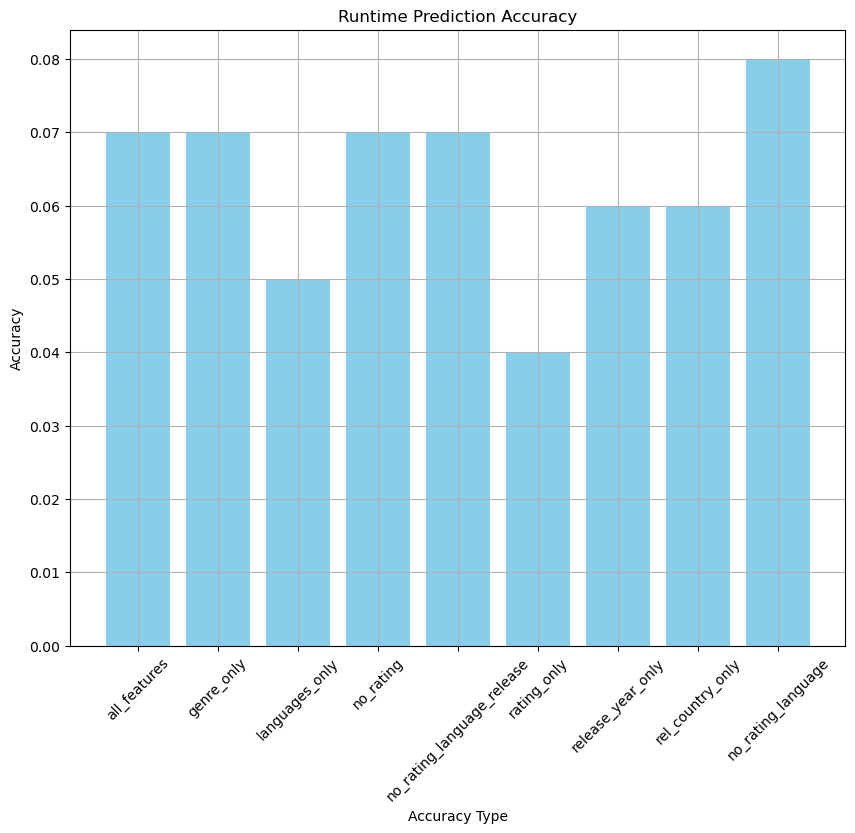

In [86]:
plt.figure(figsize=(10, 8)) 
plt.bar(titles, values, color='skyblue')
plt.xlabel('Accuracy Type')
plt.xticks(rotation=45)
plt.ylabel('Accuracy') 
plt.title('Runtime Prediction Accuracy') 
plt.grid(True)